**Imports**

In [42]:
# Standard Imports
import random

# 3rd Party
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from pgmpy.estimators import PC
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Synthcity
from synthcity.plugins.core.dataloader import GenericDataLoader

# Goggle
from goggle.GoggleModel import GoggleModel

**Load data**

In [15]:
# create a causal graph

adj_matrix = np.zeros((46, 46))
adj_matrix = pd.DataFrame(adj_matrix)
adj_matrix.columns = X.columns
adj_matrix.index = X.columns
adj_matrix

,aceB,asnA,atpD,atpG,b1191,b1583,b1963,cchB,cspA,cspG,...,ycgX,yecO,yedE,yfaD,yfiA,ygbD,ygcE,yhdM,yheI,yjbO
aceB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
asnA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
atpD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
atpG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b1191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b1583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cchB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cspA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cspG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
dependencies = {
    'b1191':["fixC", "tnaA", "ygcE"],
    'eutG':["yceP", "ibpB", "yfaD", "lacY", "sucA"],
    'fixC':["ygbD", "yjbO", "cchB", "yceP", "tnaA", "ycgX"],
    'sucA':["tnaA", "yfaD", "ygcE", "dnaJ", "flgD", "gltA", "sucD", "yhdM", "atpD", "atpG"],
    'yceP':["b1583", "ibpB", "yfaD"],
    'ygcE':["icdA", "asnA", "atpD"],
    'asnA':["icdA", "lacZ", 'lacA', "lacY"],
    'cspG':["lacA", "lacY", "yaeM", "cspA", "yecO", "pspA", "pspB", "yedE"],
    'atpD':["yheI"],
    'icdA':["aceB"],
    'lacA':["b1583", "yaeM", "lacZ", "lacY"],
    'cspA':["hupB", "yfiA"],
    'yedE':["pspB", "pspA", "lpdA", "yheI"],
    'lacZ':['b1583', "yaeM", "mopB"],
    'pspA':["nmpC"],
    "ycgX":["dnaG"],
    'dnaK':["mopB"],
    'mopB':["ftsJ"]
}

In [44]:
for key in dependencies.keys():
    
    for node in dependencies[key]:
        adj_matrix[key][node] = 1

In [36]:
adj_matrix

,aceB,asnA,atpD,atpG,b1191,b1583,b1963,cchB,cspA,cspG,...,ycgX,yecO,yedE,yfaD,yfiA,ygbD,ygcE,yhdM,yheI,yjbO
aceB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
asnA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
atpD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
atpG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b1191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
b1583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cchB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cspA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
cspG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
adj_matrix.to_csv("../data/ecoli_adj_matrix.csv")

In [46]:
dataset = "ecoli_prior"
X = pd.read_csv("../data/ecoli.csv")
ind = list(range(len(X.columns)))
col_list = X.columns[ind]
ct = ColumnTransformer(
    [("scaler", StandardScaler(), col_list)], remainder="passthrough"
)

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X.head()

,aceB,asnA,atpD,atpG,b1191,b1583,b1963,cchB,cspA,cspG,...,ycgX,yecO,yedE,yfaD,yfiA,ygbD,ygcE,yhdM,yheI,yjbO
0,-1.366583,0.897457,-1.156795,0.311058,0.628408,0.948544,1.412623,0.051550,-0.981955,-0.391940,...,1.617670,-0.171806,-0.541954,-0.083750,-0.219333,0.708546,1.237292,-0.439311,1.442173,0.951423
1,-0.732967,-0.708462,0.572233,0.530854,-0.761366,0.158858,-0.949638,0.547262,0.153696,0.424002,...,-0.631236,0.717723,0.463752,-0.408105,0.295668,-0.627091,-0.113875,-0.746462,-0.467981,-0.226011
2,-0.264288,0.724458,-0.171507,1.092941,0.211019,0.206270,0.759958,0.916874,0.294145,-0.269031,...,0.613481,0.438235,0.743242,-1.932966,0.479782,0.363581,0.760695,-1.222364,0.377934,1.212195
3,-0.060386,0.433983,0.104606,1.708677,-0.041024,-0.177336,0.561108,0.149842,-0.728569,-0.573234,...,0.542665,-0.403390,0.579334,-0.147022,-0.496485,0.490836,0.385089,0.109617,0.293186,0.467212
4,0.949793,-0.676361,0.373228,-1.808975,-0.335226,2.313668,0.304041,0.031106,0.438173,1.331025,...,-0.216222,0.961096,-0.145808,1.030528,0.282467,0.654497,-0.764234,0.274339,-0.108069,0.124563


**Load prior knowledge**

In [49]:
adj_mat_100 = pd.read_csv("../data/ecoli_adj_matrix.csv", index_col=0).values
adj_mat_50 = adj_mat_100.copy()
for i in range(adj_mat_50.shape[0]):
    for j in range(adj_mat_50.shape[1]):
        if adj_mat_50[i][j] == 1:
            if random.random() < 0.5:
                adj_mat_50[i][j] = 0

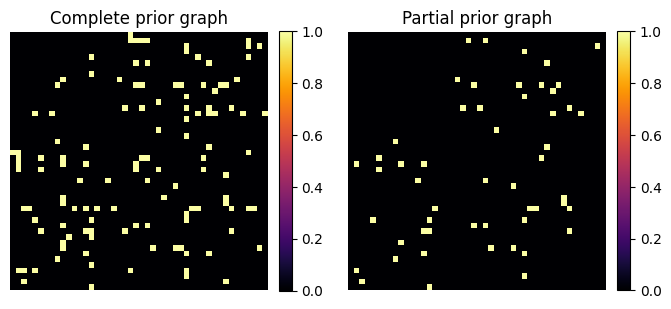

In [50]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax1, ax2 = axes
im1 = ax1.imshow(adj_mat_100, cmap="inferno", interpolation="nearest", vmin=0, vmax=1.0)
fig.colorbar(im1, fraction=0.046, pad=0.04, ax=ax1)
ax1.set_title("Complete prior graph")
ax1.axis("off")

im2 = ax2.imshow(adj_mat_50, cmap="inferno", interpolation="nearest", vmin=0, vmax=1.0)
plt.colorbar(im2, fraction=0.046, pad=0.04, ax=ax2)
ax2.set_title("Partial prior graph")
ax2.axis("off")
fig.show()

**Fit model - prior knowledge**

In [51]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2, shuffle=True)
adj_mat_0 = None

for prior in [None, adj_mat_0, adj_mat_50, adj_mat_100]:
    print(prior)
    if prior is None:
        graph_prior = None
        prior_mask = None
    else:
        graph_prior = torch.Tensor(prior)
        prior_mask = torch.Tensor(prior)

    gen = GoggleModel(
        ds_name=dataset,
        input_dim=X_train.shape[1],
        encoder_dim=64,
        encoder_l=2,
        het_encoding=True,
        decoder_dim=64,
        decoder_l=1,
        threshold=0.1,
        decoder_arch="gcn",
        graph_prior=graph_prior,
        prior_mask=prior_mask,
        device="cpu",
        beta=1,
        learning_rate=0.01,
        seed=0,
    )

    gen.fit(X_train)
    
    X_synth = gen.sample(X_test)
    X_synth.head()

    X_synth_loader = GenericDataLoader(
        X_synth,
    )
    X_test_loader = GenericDataLoader(
        X_test,
    )

    res = gen.evaluate_synthetic(X_synth_loader, X_test_loader)
    print(f"Quality: {res[0]:.3f}")
    print(f"Detection: {res[2]:.3f}")
    print(
        f"Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}, diff: {res[1][0] - res[1][1]:.3f}"
    )

None
[Epoch 100/1000, patience  4] train: 13.706, val: 14.235
[Epoch 200/1000, patience  6] train: 10.734, val: 11.370
[Epoch 300/1000, patience  0] train: 9.620, val: 10.038
[Epoch 400/1000, patience 13] train: 9.134, val: 9.411
[Epoch 500/1000, patience  1] train: 8.823, val: 9.032
[Epoch 600/1000, patience 21] train: 8.566, val: 8.971
Training terminated after 628 epochs
cache loaded
cache loaded
cache loaded
Quality: 0.611
Detection: 0.712
Performance on real: -0.385, on synth: -10.613, diff: 10.228
None
[Epoch 100/1000, patience  4] train: 13.706, val: 14.235
[Epoch 200/1000, patience  6] train: 10.734, val: 11.370
[Epoch 300/1000, patience  0] train: 9.620, val: 10.038
[Epoch 400/1000, patience 13] train: 9.134, val: 9.411
[Epoch 500/1000, patience  1] train: 8.823, val: 9.032
[Epoch 600/1000, patience 21] train: 8.566, val: 8.971
Training terminated after 628 epochs
cache loaded
cache loaded
cache loaded
Quality: 0.611
Detection: 0.712
Performance on real: -0.385, on synth: -10.